In [29]:
"""Jupyter Notebook for finding the hard-soft boundary 
    we will use to define our binary population given by cosmic
    HS Cutoff period should be longer for OCs (less dense) 
    and shorter for GCs (more densely packed)"""

'Jupyter Notebook for finding the hard-soft boundary \n    we will use to define our binary population given by cosmic\n    HS Cutoff period should be longer for OCs (less dense) \n    and shorter for GCs (more densely packed)'

In [30]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.sample.sampler import multidim
from cosmic.evolve import Evolve

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Dictionary neeeded for evolving the binaries
BSEDict = {'xi': 0.5, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 0,\
           'alpha1': 1.0, 'pts1': 0.05, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, \
           'hewind': 1.0, 'ck': -1000, 'bwind': 0.0, 'lambdaf': 1.0, 'mxns': 3.0, \
           'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'nsflag': 3, 'ceflag': 0, 'eddfac': 1.0, \
           'merger': 0, 'ifflag': 0, 'bconst': -3000, 'sigma': 265.0, 'gamma': -2.0, \
           'ppsn': 1, 'natal_kick_array' :[-100.0,-100.0,-100.0,-100.0,-100.0,-100.0], \
           'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, \
           'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],\
           'cekickflag' : 0, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsnp' : 2.5, \
           'ecsn_mlow' : 1.6, 'aic' : 1, 'sigmadiv' :-20.0}

In [33]:
final_kstar1 = [11,12]
final_kstar2 = [10]

# Sampling initial binaries - pulled from cosmic's documentation
InitialBinaries, sampled_mass, n_sampled = InitialBinaryTable.sampler('multidim', [0,14], [0,14], \
                            2,1, SFH_model='delta_burst', \
                            component_age=10000.0, met=0.02, size=60000)

In [34]:
p_i = InitialBinaries['porb'] #given in days *i think: https://cosmic-popsynth.github.io/examples/index.html


Text(0.5, 0, 'Input Periods (log-days)')

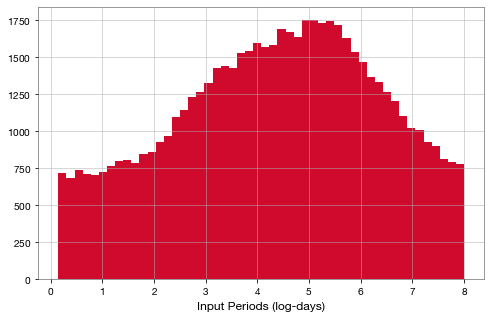

In [40]:
# Initial Binary Period Histogram
f,ax = plt.subplots(figsize = (8,5))

ax.hist(np.log10(p_i), bins = 50, color = '#CF0A2C')
ax.set_xlabel('Input Periods (log-days)')

# Cutoff periods must be set by cosmic

In [36]:
# Evolving the binaries
bpp, bcm, initC  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

In [37]:
p_f = bcm['porb']
print(p_f.loc[np.where(p_f <0)])

Series([], Name: porb, dtype: float64)


Text(0.5, 0, 'Evolved periods (log-days)')

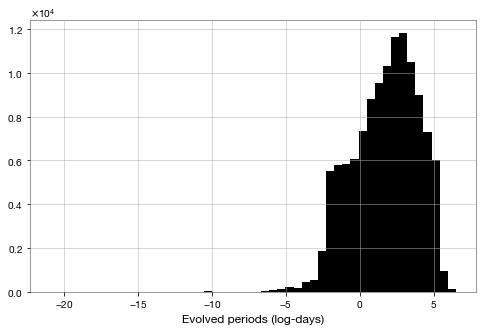

In [42]:
# Evolved Binary Histogram - Period

f,ax = plt.subplots(figsize = (8,5))
ax.hist(np.log10(p_f), bins = 50, color = 'black')

ax.set_xlabel('Evolved periods (log-days)')